In [81]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

In [66]:
url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'
df = pd.read_csv(url)

In [67]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [68]:
us_df = df[df['Country'] == 'India']

In [69]:
us_df.dropna()
time_index = us_df['Date']

In [70]:
X = sm.add_constant(np.arange(len(us_df)))

model = sm.OLS(us_df['Confirmed'], X)
results = model.fit()

In [71]:
from matplotlib import pyplot as plt

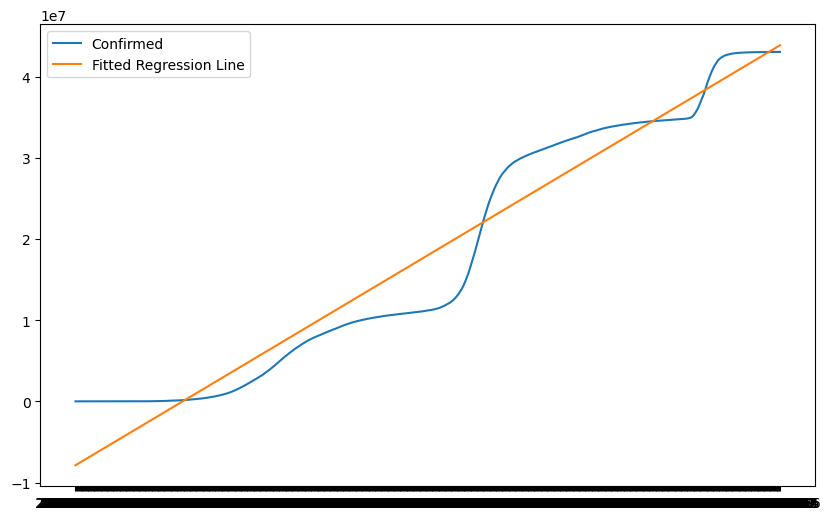

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(time_index, us_df['Confirmed'], label='Confirmed')
plt.plot(time_index, results.fittedvalues, label='Fitted Regression Line')
plt.legend()
plt.show()

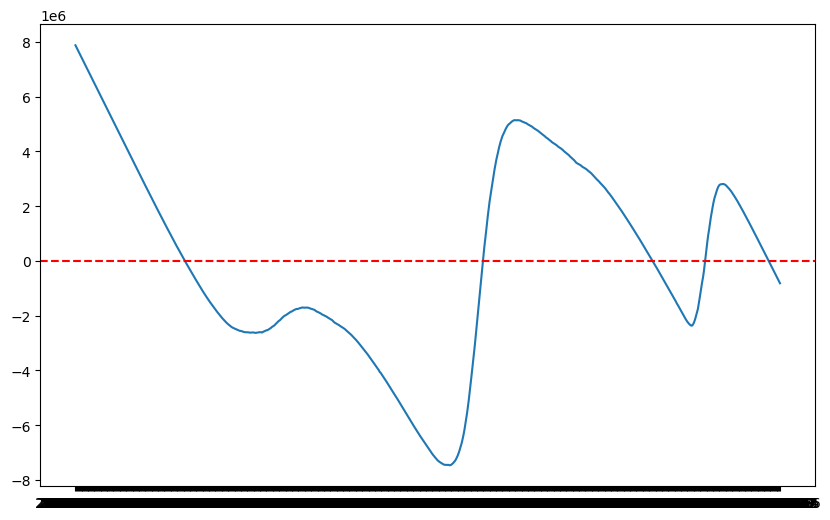

In [89]:
# plot residuals
plt.figure(figsize=(10, 6))
plt.plot(time_index, results.resid)
plt.axhline(0, color='r', linestyle='--')
plt.show()

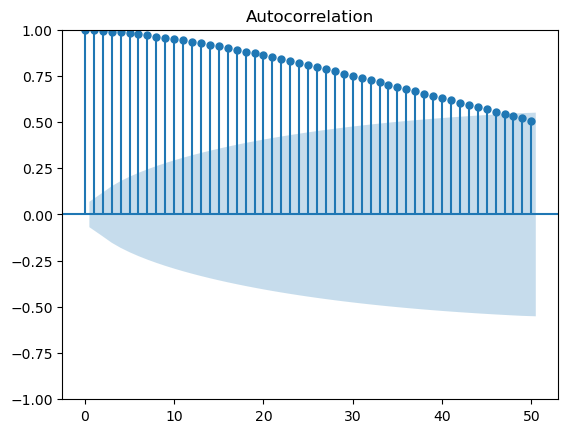

In [84]:
# run acf test on residuals

plot_acf(results.resid, lags=50)
plt.show()

In [73]:
# ADF Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(us_df['Confirmed'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -0.555754
p-value: 0.880670
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


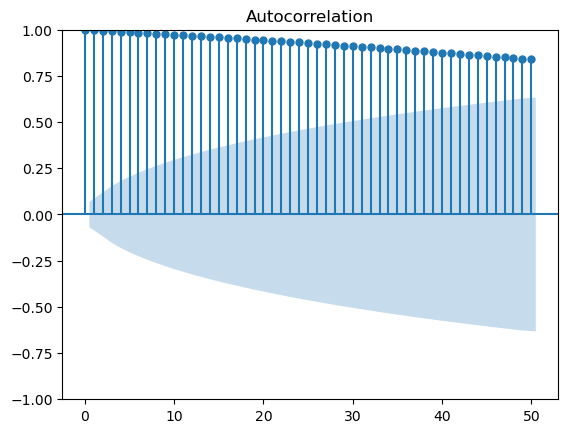

In [74]:
# ACF Plot
plot_acf(us_df['Confirmed'], lags=50)
plt.show()

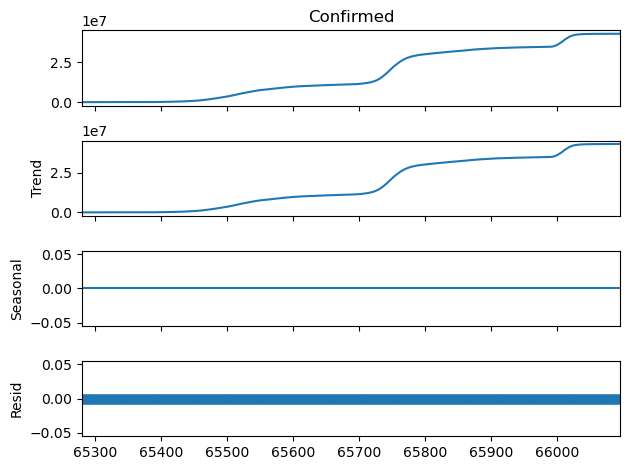

In [75]:
# Break into Trend, Seasonal, and Residual Components
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(us_df['Confirmed'], model='additive', period=1)
result.plot()
plt.show()

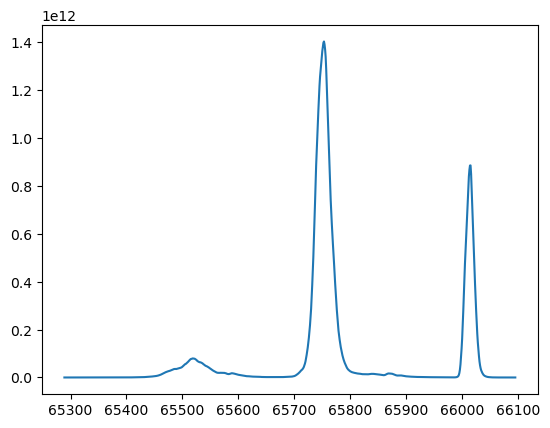

In [88]:
# rolling variance
us_df['Confirmed'].rolling(window=10).var().plot()
plt.show()